<a href="https://colab.research.google.com/github/fllopes/https---github.com-fllopes-FUNCATE_FREL_2022/blob/master/GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Polygon, MultiPolygon

Arquivo lido com sucesso, contendo 3312 geometrias.
['Polygon', 'MultiPolygon']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.


['Polygon']
id:  (0, 0) geometry:  (((-68.17971672958912, 1.499658327363501, 0.0), (-68.17885734455358, 1.4968881782765318, 0.0), (-68.1784808483884, 1.4949457490512317, 0.0), (-68.17838721104467, 1.4932893962955547, 0.0), (-68.17836573576233, 1.4885044237287082, 0.0), (-68.1786969364495, 1.4867062840114464, 0.0), (-68.17912169146204, 1.4854246677349103, 0.0), (-68.1791904305802, 1.4855277763573667, 0.0), (-68.1793083520635, 1.4857046584884, 0.0), (-68.17932152184032, 1.485889037428135, 0.0), (-68.17941615285623, 1.48721386529712, 0.0), (-68.17984735470985, 1.4878606677342137, 0.0), (-68.17989283822877, 1.4882700238881368, 0.0), (-68.17995515537119, 1.4888308724231287, 0.0), (-68.18038635812424, 1.4894776748603296, 0.0), (-68.18039301316038, 1.4895708486424832, 0.0), (-68.18019855830258, 1.4901206391268627, 0.0), (-68.18043277223087, 1.492677863014758, 0.0), (-68.18103316186111, 1.4943437673863114, 0.0), (-68.1810331619634, 1.4947598990744675, 0.0), (-68.18137901144782, 1.4953033761556

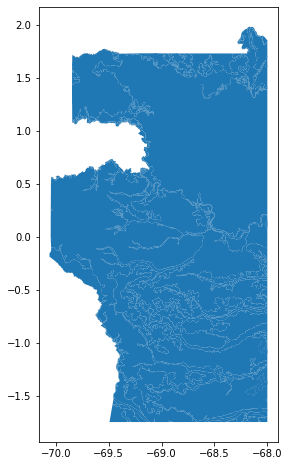

In [30]:
# Process validation: ok
def remove_dimension_z(data):   

    new_geo = []
    
    for pol in data.geometry:
        
        if pol.has_z:
            
            if pol.geom_type == 'Polygon':
                                
                lines = [xy[:2] for xy in list(pol.exterior.coords)]
                
                new_p = Polygon(lines)
                
                new_geo.append(new_p)
                
    data.geometry = new_geo    
    

# Process validation of 'multipol_to_pol': ok
def multipol_to_pol(data):
    
    distinct_types = geometry_type_check(data)
        
    if 'MultiPolygon' in distinct_types:
    
        new_data = data.explode()
            
        multipol_to_pol(new_data)

    else: new_data = data
        
    return new_data



def geometry_type_check(data):
    
    distinct_types = []

    for pol in data.iterfeatures():
        
        if pol['geometry']['type'] not in distinct_types:
            
            distinct_types.append(pol['geometry']['type'])
            
        else: pass
    
    print(distinct_types)
    
    return distinct_types



# Process validation of 'remove_dimension_z': ok
def pols_visual_check(data):

  for i, pol in enumerate(data.iterfeatures()):

    if i < 1:

      print('id: ', pol['id'], ', geometry: ', pol['geometry']['coordinates'])

    else: break



def main():

  try:

    input_data = gpd.read_file( r'amazonia_carbono_vegetacao_1.shp' )

    print('Arquivo lido com sucesso, contendo {} geometrias.'.format(len(input_data)))

  except:

    print('erro na leitura do arquivo.\n')

    raise

  input_data_exp = multipol_to_pol(input_data)

  remove_dimension_z(input_data_exp)


# union = gpd.overlay(input_data_exp, input_data_exp, how = 'union', keep_geom_type = True)



# diss = input_data.dissolve(by = ['C_PRETORIG', 'C_PRETVIZI', 'CATEGORIG', 'CATEGVIZI', 'TIPO', 'CDW', 'CLITTER', 'CTOTAL4INV', 'CAGB', 'CBGB'], as_index=False)


  fig, ax = plt.subplots(figsize = (10,8))

  input_data_exp.plot(ax = ax)


main()